Grupo: Neural Nexus

BEJARANO LARRAHONDO RONALD STIVEN, FRANCO SUAREZ ANDREA, GALVIS PEDRAZA HARDY, URBANO URBANO CARLOS ANDRES, VARELA JOVEN ANDRES FELIPE


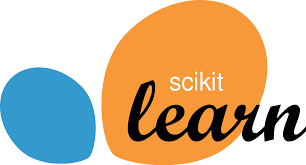

# **SCIKIT LEARN**
 Scikit learn es una libreria open source para machine learning que soporta aprendizaje supervisado y no supervisado. También provee diferentes herramientas para ajuste de modelos, procesamiento de datos, evaluacion de modelos entre otras utilidades. Construida sobre NumPy, SciPy y Matplotlib.  



"*Este paquete se enfoca en llevar el aprendizaje automático a los no especialistas mediante un lenguaje de alto nivel de propósito general. Su énfasis está en la facilidad de uso, el rendimiento, la documentación y la coherencia de la API*"

Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.

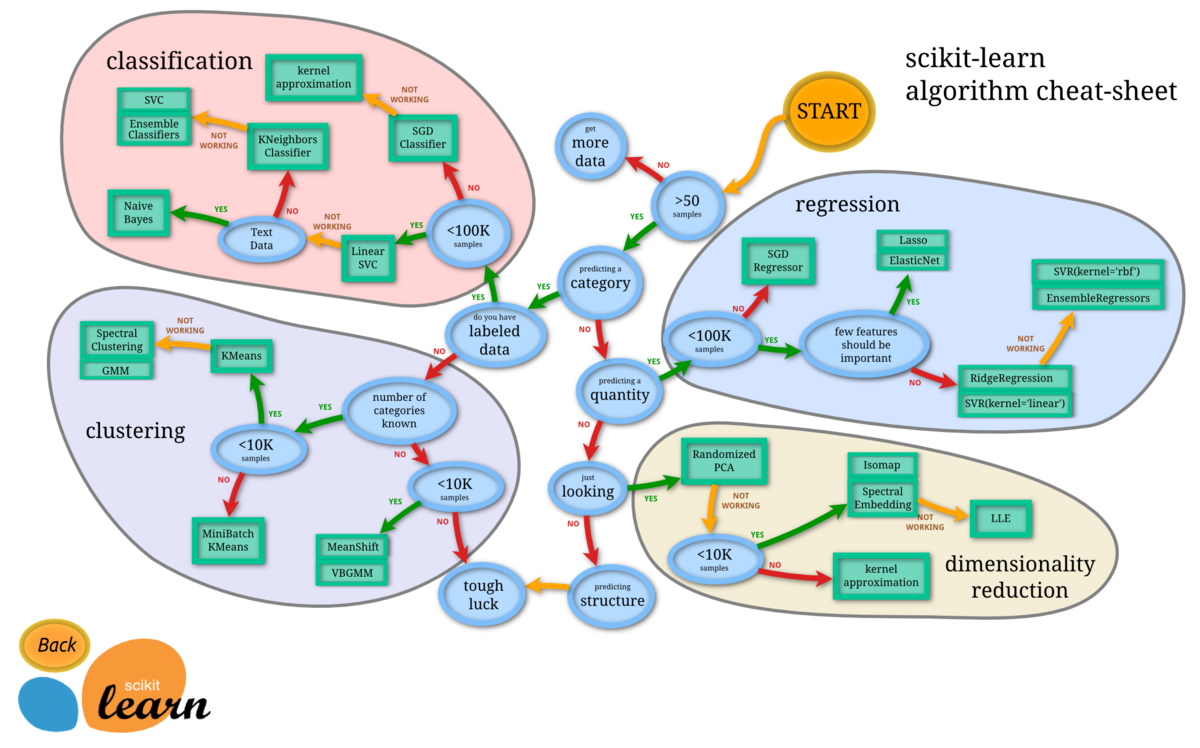

[Choosing the right estimator](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

### Instalación de la libreria

In [7]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Cargando un Dataset de ejemplo

Dentro de la libreria podemos encontrar datasets de ejemplo entre ellos tenemos:



1. Iris
2. Boston
3. Breast Cancer
4. Diabetes
5. Files
6. Wine
7. Sample image
8. Sample images
9. Linnerud
10. Svm lightfile
11. Svm light files
12. Digits




In [8]:
from sklearn import datasets

digits=datasets.load_digits() #con el objeto dataset y la funcion load cargamos el conjunto de datos


Vamos a ver un ejemplo con el dataset Digits para la clasificacion de imagenes, este dataset contiene digitos escritos a mano.
El dataset esta conformado por 1797 imagenes de 8x8 pixeles


Ploteamos el digito correspondiente a la posicion (999) dentro del dataset

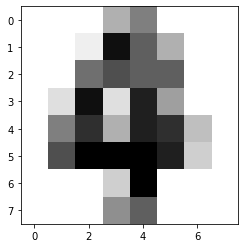

In [9]:
import matplotlib.pyplot as plt
# ploteamos un digito del dataset utilizando matplotlib
plt.figure(1, figsize=(4, 4))
plt.imshow(digits.images[450], cmap=plt.cm.gray_r, interpolation="nearest")
plt.show()

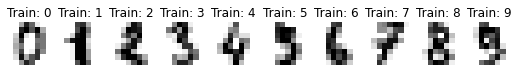

In [10]:
# con esta linea de codigo podemos visualizar imagenes
# utilizadas en el entrenamiento relacionadas a cada digito
#para ello utilizamos recursos de matplotlib para ploetarlos pixeles en escala
#grises

_,axes = plt.subplots(nrows=1, ncols=10, figsize=(9, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Train: %i" % label)

### Clasificacion y manipulacion de datos

Para aplicar un clasificador en esta data es necesario que las matrices correpondientes a cada numero debn reducirse a una sola dimension, obteniendo arreglos de 2-D (8,8) en un vector de (64), todo el dataset tendra la fomra de (n_muestras,n_atributos) donde n_muestras es el numero de imagenes y n_atributos el numero total de pixeles en cada imagen

In [11]:
# reduccion de dimensionalidad
n_muestras = len(digits.images)#obtenemos la longitud del numero de muestras
#print(n_muestras)
print(digits.images[1])
data = digits.images.reshape((n_muestras, -1))#con -1 tomamos todos lo valores del array en una sola fila


[[ 0.  0.  0. 12. 13.  5.  0.  0.]
 [ 0.  0.  0. 11. 16.  9.  0.  0.]
 [ 0.  0.  3. 15. 16.  6.  0.  0.]
 [ 0.  7. 15. 16. 16.  2.  0.  0.]
 [ 0.  0.  1. 16. 16.  3.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  0. 11. 16. 10.  0.  0.]]


### Entrenamiento del modelo

In [12]:
from sklearn import svm
from sklearn.model_selection import train_test_split
#se crea un clasificador, una support vector machine
clf = svm.SVC(gamma=0.0001)

# se divide la data en 50% entrenmiento y 50% en test
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5, shuffle=False)

# el modelo aprende los digitos del sub set de datos de entrenamiento
clf.fit(X_train, y_train)

#El modelo predice el valor del digito en el sub set de datos te prueba (test)
predicted = clf.predict(X_test)

### Visualizacion de resultados


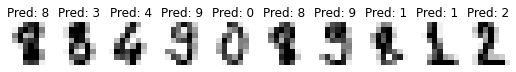

In [13]:
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(9, 3)) #se imprime 1 fila con 10 col 
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest") 
    ax.set_title(f"Pred: {prediction}")

### Reporte de Resultados

con la herramienta "classification_report" podemos acceder a un reporte en formato texto con las metricas relacionadas a la clasificacion

In [14]:
from sklearn import metrics
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.0001):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        88
           1       0.95      0.90      0.93        91
           2       1.00      0.94      0.97        86
           3       0.95      0.87      0.91        91
           4       0.99      0.95      0.97        92
           5       0.90      0.96      0.93        91
           6       0.99      0.99      0.99        91
           7       0.92      0.98      0.95        89
           8       0.92      0.89      0.90        88
           9       0.83      0.95      0.88        92

    accuracy                           0.94       899
   macro avg       0.94      0.94      0.94       899
weighted avg       0.94      0.94      0.94       899




### Mas visualizaciones: Matriz de confusion

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 82  0  0  0  1  0  0  0  8]
 [ 1  0 81  2  0  0  0  0  0  2]
 [ 0  0  0 79  0  4  0  4  4  0]
 [ 0  0  0  0 87  0  0  1  2  2]
 [ 0  0  0  0  0 87  1  0  0  3]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 87  1  0]
 [ 0  3  0  1  0  2  0  1 78  3]
 [ 0  0  0  1  0  2  0  2  0 87]]


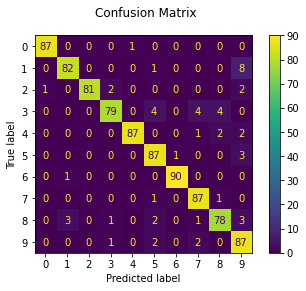

In [15]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

###Aprendizaje No Supervisado
Clustering con K-means
Para este ejemplo utilizamos la funcion de make_blobs que permite generar un dataset de n clusters y n dimensiones con el fin de probar algoritmos de clustering.

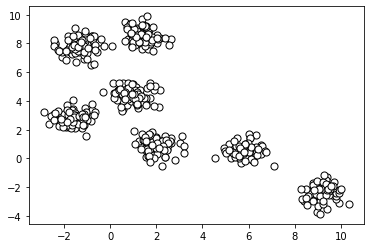

In [16]:

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# create dataset
X, y = make_blobs(
   n_samples=500, n_features=2,
   centers=7, cluster_std=0.5,
   shuffle=True, random_state=0
)

# ploteamos el dataset generado para tener una idea
plt.scatter(
   X[:, 0], X[:, 1],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.show()
#print(X)

### Utilizando scikit learn K-Means

In [17]:
from sklearn.cluster import KMeans

numeroclusters=7 # indicamos el numero de clusters
km = KMeans(
    n_clusters=numeroclusters, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X) #corremos el modelo

### visualizacion del resultado

se utiliza un algoritmo de matplotlib que nos permite iterar entre el numero de clusters para diferenciarlos en terminos de colores y labels asigandos a cada cluster y ploteamos los centroides de cada uno

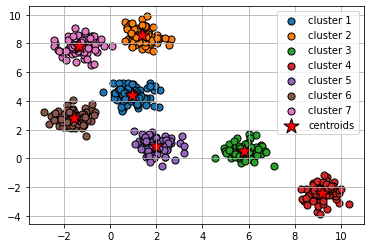

In [18]:
for i in range(0,numeroclusters):
  plt.scatter(
    X[y_km == i, 0], X[y_km == i, 1],
    s=50, 
    edgecolor='black',
    label=f'cluster {i+1}'
)

plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

## Ejemplo K means con Iris Dataset
para este ejemplo utilizamos el dataset de iris y quitamos la columna que indica la categoria de cada flor para respectivamente realizar los clusters sin categoria y finalmente compara con la data original que tan aproximada fue la clusterización 

In [19]:
from sklearn import datasets
import pandas as pd
import numpy as np
iris=datasets.load_iris()
df=pd.DataFrame(data= np.c_[iris['data']])

from sklearn.cluster import KMeans

numeroclusters=3 # indicamos el numero de clusters


km = KMeans(
    n_clusters=numeroclusters, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(df) #corremos el modelo

df[4]=y_km #creamos el vector de clasificaciones en la prediccion y lo asiganos a la cuarta columna de dataframe

df


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Visualizacion de la Data

comparamos los datos de sepal Length y sepal Width para clusterizar con estas dos caracteristicas y se dibujan los centroides en cada cluster

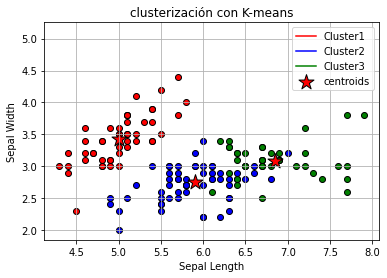

In [20]:
colors=['red','blue','green','yellow','black','magenta']
for j in range(0,numeroclusters):
  for i in range (0,len(df)):
    if df[4][i]==j:
       plt.scatter(df[0][i], df[1][i],edgecolor='black',c=colors[j])
  plt.plot(df[0][0],df[0][0],c=colors[j],label=f'Cluster{j+1}')
 

plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.grid()
plt.title('clusterización con K-means')
plt.show()

Confusion matrix:
[[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]


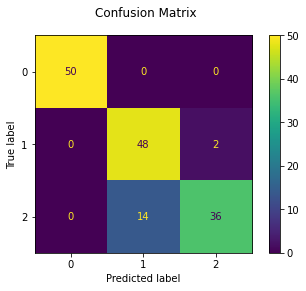

In [21]:
from sklearn import metrics
disp = metrics.ConfusionMatrixDisplay.from_predictions(iris['target'],y_km)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [22]:
from sklearn import metrics
print(metrics.classification_report(iris['target'], y_km))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.77      0.96      0.86        50
           2       0.95      0.72      0.82        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150



## Otras funciones comunes

A continuación se muestra una lista de algunos comandos útiles con scikit learn version >=0.20

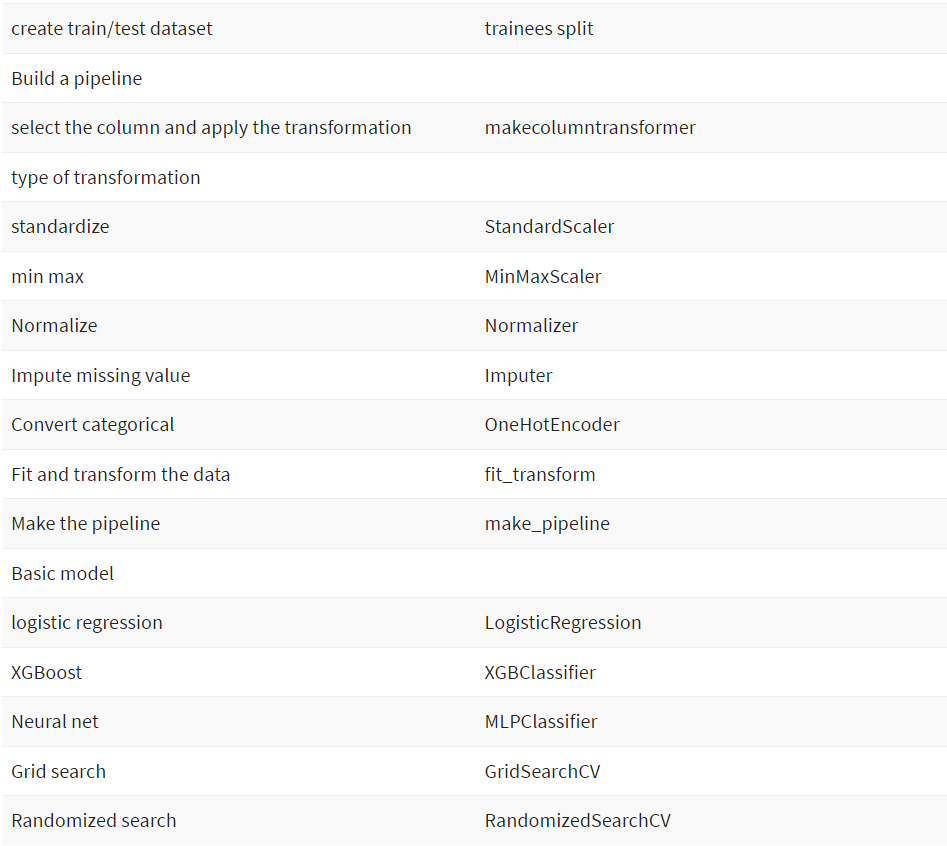

Tomado de: *https://guru99.es/scikit-learn-tutorial/*

# Link a la página oficial
https://scikit-learn.org/stable/
